In [181]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [182]:
df = pd.read_csv('Aerofit_Treadmills.txt')
df.head()

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
0,KP281,18,Male,14,Single,3,4,29562,112
1,KP281,19,Male,15,Single,2,3,31836,75
2,KP281,19,Female,14,Partnered,4,3,30699,66
3,KP281,19,Male,12,Single,3,3,32973,85
4,KP281,20,Male,13,Partnered,4,2,35247,47


In [183]:
df.shape

(180, 9)

In [184]:
df.duplicated().sum()

0

In [185]:
df.isna().sum()

Product          0
Age              0
Gender           0
Education        0
MaritalStatus    0
Usage            0
Fitness          0
Income           0
Miles            0
dtype: int64

In [186]:
df.nunique()

Product           3
Age              32
Gender            2
Education         8
MaritalStatus     2
Usage             6
Fitness           5
Income           62
Miles            37
dtype: int64

In [187]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180 entries, 0 to 179
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Product        180 non-null    object
 1   Age            180 non-null    int64 
 2   Gender         180 non-null    object
 3   Education      180 non-null    int64 
 4   MaritalStatus  180 non-null    object
 5   Usage          180 non-null    int64 
 6   Fitness        180 non-null    int64 
 7   Income         180 non-null    int64 
 8   Miles          180 non-null    int64 
dtypes: int64(6), object(3)
memory usage: 12.8+ KB


In [188]:
df.describe()

,Age,Education,Usage,Fitness,Income,Miles
count,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000
mean,28.788889,15.572222,3.455556,3.311111,53719.577778,103.194444
std,6.943498,1.617055,1.084797,0.958869,16506.684226,51.863605
min,18.000000,12.000000,2.000000,1.000000,29562.000000,21.000000
25%,24.000000,14.000000,3.000000,3.000000,44058.750000,66.000000
50%,26.000000,16.000000,3.000000,3.000000,50596.500000,94.000000
75%,33.000000,16.000000,4.000000,4.000000,58668.000000,114.750000
max,50.000000,21.000000,7.000000,5.000000,104581.000000,360.000000


In [189]:
df.mode()

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
0,KP281,25,Male,16,Partnered,3,3,45480,85


In [190]:
df['Product'].unique()

array(['KP281', 'KP481', 'KP781'], dtype=object)

In [191]:
df['Age'].unique()

array([18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 43, 44, 46, 47, 50, 45, 48, 42],
      dtype=int64)

In [192]:
bins = [14,20,30,40,60]
df['AgeGroup'] = pd.cut(df['Age'], bins)

In [193]:
labels =["Teens","20s","30s","Above 40s"]
df['AgeCategory'] = pd.cut(df['Age'], bins,labels=labels)

Categorising the age into 4 main groups. 

* Teens which is age 14-20. 
* 20s which is age 20-30.
* 30s which is age 30-40.
* Above 40s which is age above 40.


In [194]:
df['Gender'].unique()

array(['Male', 'Female'], dtype=object)

In [195]:
df['Education'].unique()

array([14, 15, 12, 13, 16, 18, 20, 21], dtype=int64)

In [196]:
df['MaritalStatus'].unique()

array(['Single', 'Partnered'], dtype=object)

In [197]:
df['Usage'].unique()

array([3, 2, 4, 5, 6, 7], dtype=int64)

In [198]:
df['Fitness'].unique()

array([4, 3, 2, 1, 5], dtype=int64)

In [199]:
bins_fitness = [1, 2, 3, 5]
labels_fitness = ['Unfit','Moderately Fit','Super Fit']
df['FitCategory'] = pd.cut(df['Fitness'],bins_fitness,labels = labels_fitness)

Categorising fitness into 3 main categories.

* 1 and 2:- Unfit
* 3:- Moderately Fit
* 4 and 5:- Super Fit

In [200]:
df['Income'].unique()

array([ 29562,  31836,  30699,  32973,  35247,  37521,  36384,  38658,
        40932,  34110,  39795,  42069,  44343,  45480,  46617,  48891,
        53439,  43206,  52302,  51165,  50028,  54576,  68220,  55713,
        60261,  67083,  56850,  59124,  61398,  57987,  64809,  47754,
        65220,  62535,  48658,  54781,  48556,  58516,  53536,  61006,
        57271,  52291,  49801,  62251,  64741,  70966,  75946,  74701,
        69721,  83416,  88396,  90886,  92131,  77191,  52290,  85906,
       103336,  99601,  89641,  95866, 104581,  95508], dtype=int64)

In [201]:
bins_income = [29000, 35000, 60000, 85000, 105000]
labels_income = ['Low Income','Lower-middle income','Upper-Middle income', 'High income']
df['IncomeSlab'] = pd.cut(df['Income'],bins_income,labels = labels_income)

Categorising Income into 4 main Categories:

* 29000-35000:- Low Income
* 35000-60000:- Lower middle Income
* 60000-85000:- Upper middle Income
* 85000-105000:- High Income 

In [202]:
df['Miles'].unique()

array([112,  75,  66,  85,  47, 141, 103,  94, 113,  38, 188,  56, 132,
       169,  64,  53, 106,  95, 212,  42, 127,  74, 170,  21, 120, 200,
       140, 100,  80, 160, 180, 240, 150, 300, 280, 260, 360], dtype=int64)

In [203]:
df.head(10)

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles,AgeGroup,AgeCategory,FitCategory,IncomeSlab
0,KP281,18,Male,14,Single,3,4,29562,112,"(14, 20]",Teens,Super Fit,Low Income
1,KP281,19,Male,15,Single,2,3,31836,75,"(14, 20]",Teens,Moderately Fit,Low Income
2,KP281,19,Female,14,Partnered,4,3,30699,66,"(14, 20]",Teens,Moderately Fit,Low Income
3,KP281,19,Male,12,Single,3,3,32973,85,"(14, 20]",Teens,Moderately Fit,Low Income
4,KP281,20,Male,13,Partnered,4,2,35247,47,"(14, 20]",Teens,Unfit,Lower-middle income
5,KP281,20,Female,14,Partnered,3,3,32973,66,"(14, 20]",Teens,Moderately Fit,Low Income
6,KP281,21,Female,14,Partnered,3,3,35247,75,"(20, 30]",20s,Moderately Fit,Lower-middle income
7,KP281,21,Male,13,Single,3,3,32973,85,"(20, 30]",20s,Moderately Fit,Low Income
8,KP281,21,Male,15,Single,5,4,35247,141,"(20, 30]",20s,Super Fit,Lower-middle income
9,KP281,21,Female,15,Partnered,2,3,37521,85,"(20, 30]",20s,Moderately Fit,Lower-middle income


Understanding the Distribution of Data

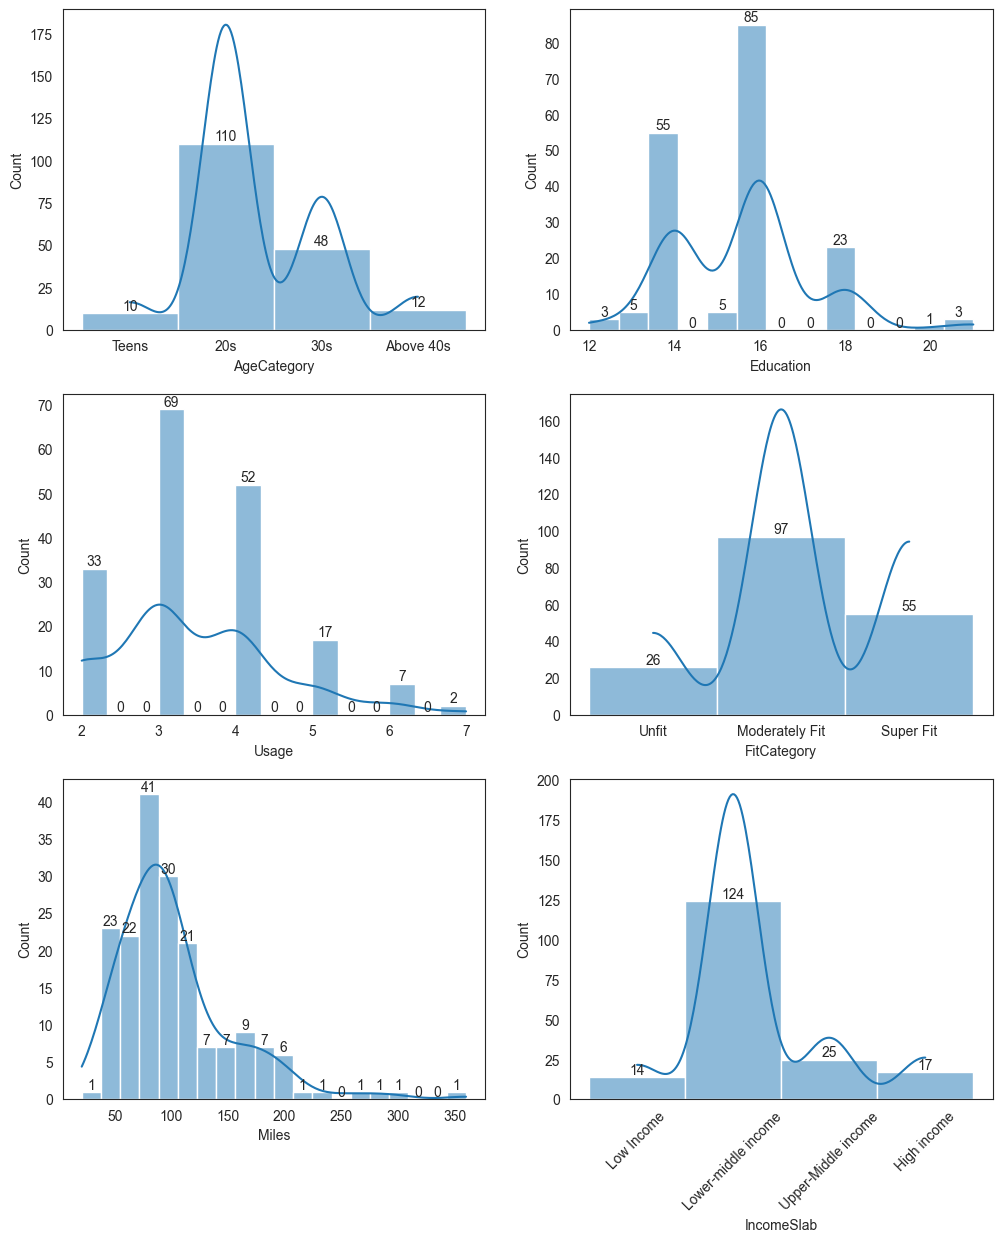

In [233]:
fig, axis = plt.subplots(nrows=3, ncols=2, figsize=(12, 10))
fig.subplots_adjust(top=1.2)

label = sns.histplot(data=df, x="AgeCategory", kde=True, ax=axis[0,0])
for i in label.containers:
    label.bar_label(i)
    
label = sns.histplot(data=df, x="Education", kde=True, ax=axis[0,1])
for i in label.containers:
    label.bar_label(i)
    
label = sns.histplot(data=df, x="Usage", kde=True, ax=axis[1,0])
for i in label.containers:
    label.bar_label(i)
    
label = sns.histplot(data=df, x="FitCategory", kde=True, ax=axis[1,1])
for i in label.containers:
    label.bar_label(i)
    
label = sns.histplot(data=df, x="Miles", kde=True, ax=axis[2,0])
for i in label.containers:
    label.bar_label(i)
    
label = sns.histplot(data=df, x="IncomeSlab", kde=True, ax=axis[2,1])
plt.xticks(rotation = 45)
for i in label.containers:
    label.bar_label(i)
    
plt.show()

Insights

AgeCategory

* People in the 20s have bought the most number of treadmills followed by people in their 30s and above 40s.


Education

* People buyng treadmills are all mostly graduated or atleast have 14 years of education.

Usage

* Most customers are using the treadmill for atleast 3-4 times per time.

FitCategory

* Most customers using the treadmill are moderately fit or super fit.

Miles

* Customers using the treadmill are walking around 50-100 miles each week.

IncomeSlab

* Most people buying the treadmill fall under the Lower - middle Income slab or earn around $35000-$60000 Anually.

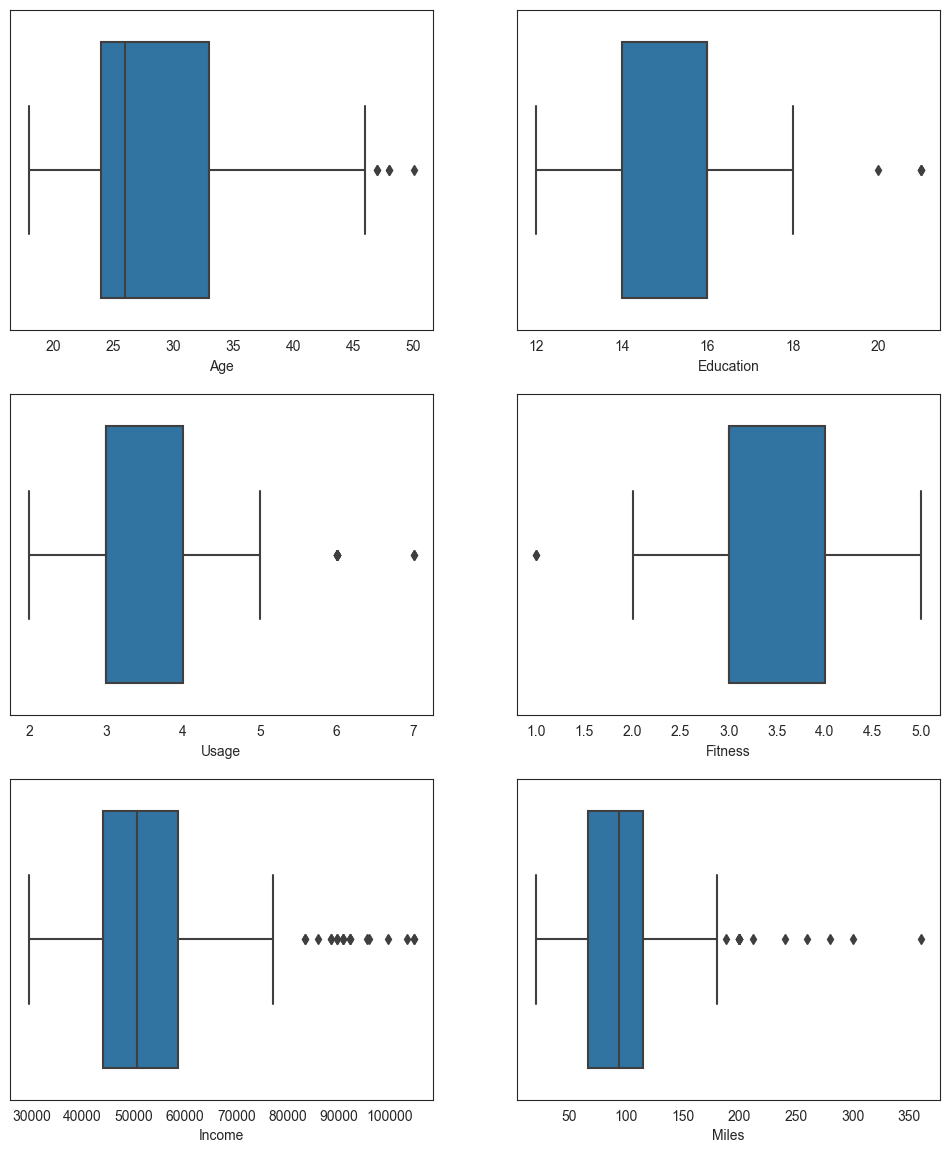

In [205]:
fig, axis = plt.subplots(nrows=3, ncols=2, figsize=(12, 10))
fig.subplots_adjust(top=1.2)

sns.boxplot(data=df, x="Age", orient='h', ax=axis[0,0])
sns.boxplot(data=df, x="Education", orient='h', ax=axis[0,1])
sns.boxplot(data=df, x="Usage", orient='h', ax=axis[1,0])
sns.boxplot(data=df, x="Fitness", orient='h', ax=axis[1,1])
sns.boxplot(data=df, x="Income", orient='h', ax=axis[2,0])
sns.boxplot(data=df, x="Miles", orient='h', ax=axis[2,1])
plt.show()

Insights

Age

* The median age is around 26 years. 
* Data lies between 18-46 years of age. 
* Most data lies between 24 and 33 years of age.
* Data with 46+ are considered outliers. 

Education

* Most people have 12-18 years of education.
* Most data lies between 14 and 16 years of education.
* Their are outliers for education which are 20 and 21 years of age.

Usage

* Most customers use the treadmill for 3-4 times per week. 
* Customers using the treadmills use the treadmill for 2-5 times per week.
* Outliers are 6 and 7 times per week.

Fitness

* Most customers lie on 4-5 on the scale of fitness. 
* Customers fall between 2-5 on the scale of fitness.
* 1 rating is the outlier.

Income

* The median income is $50000.
* Most data lies between $45000 and $60000.
* Whole data lies between $30000 and $78000.
* There are outliers above $84000

Miles

* Most people expect to walk between 60-110 miles per week.
* Median expectation for customers is 95 miles.
* There are outliers above 175 miles.

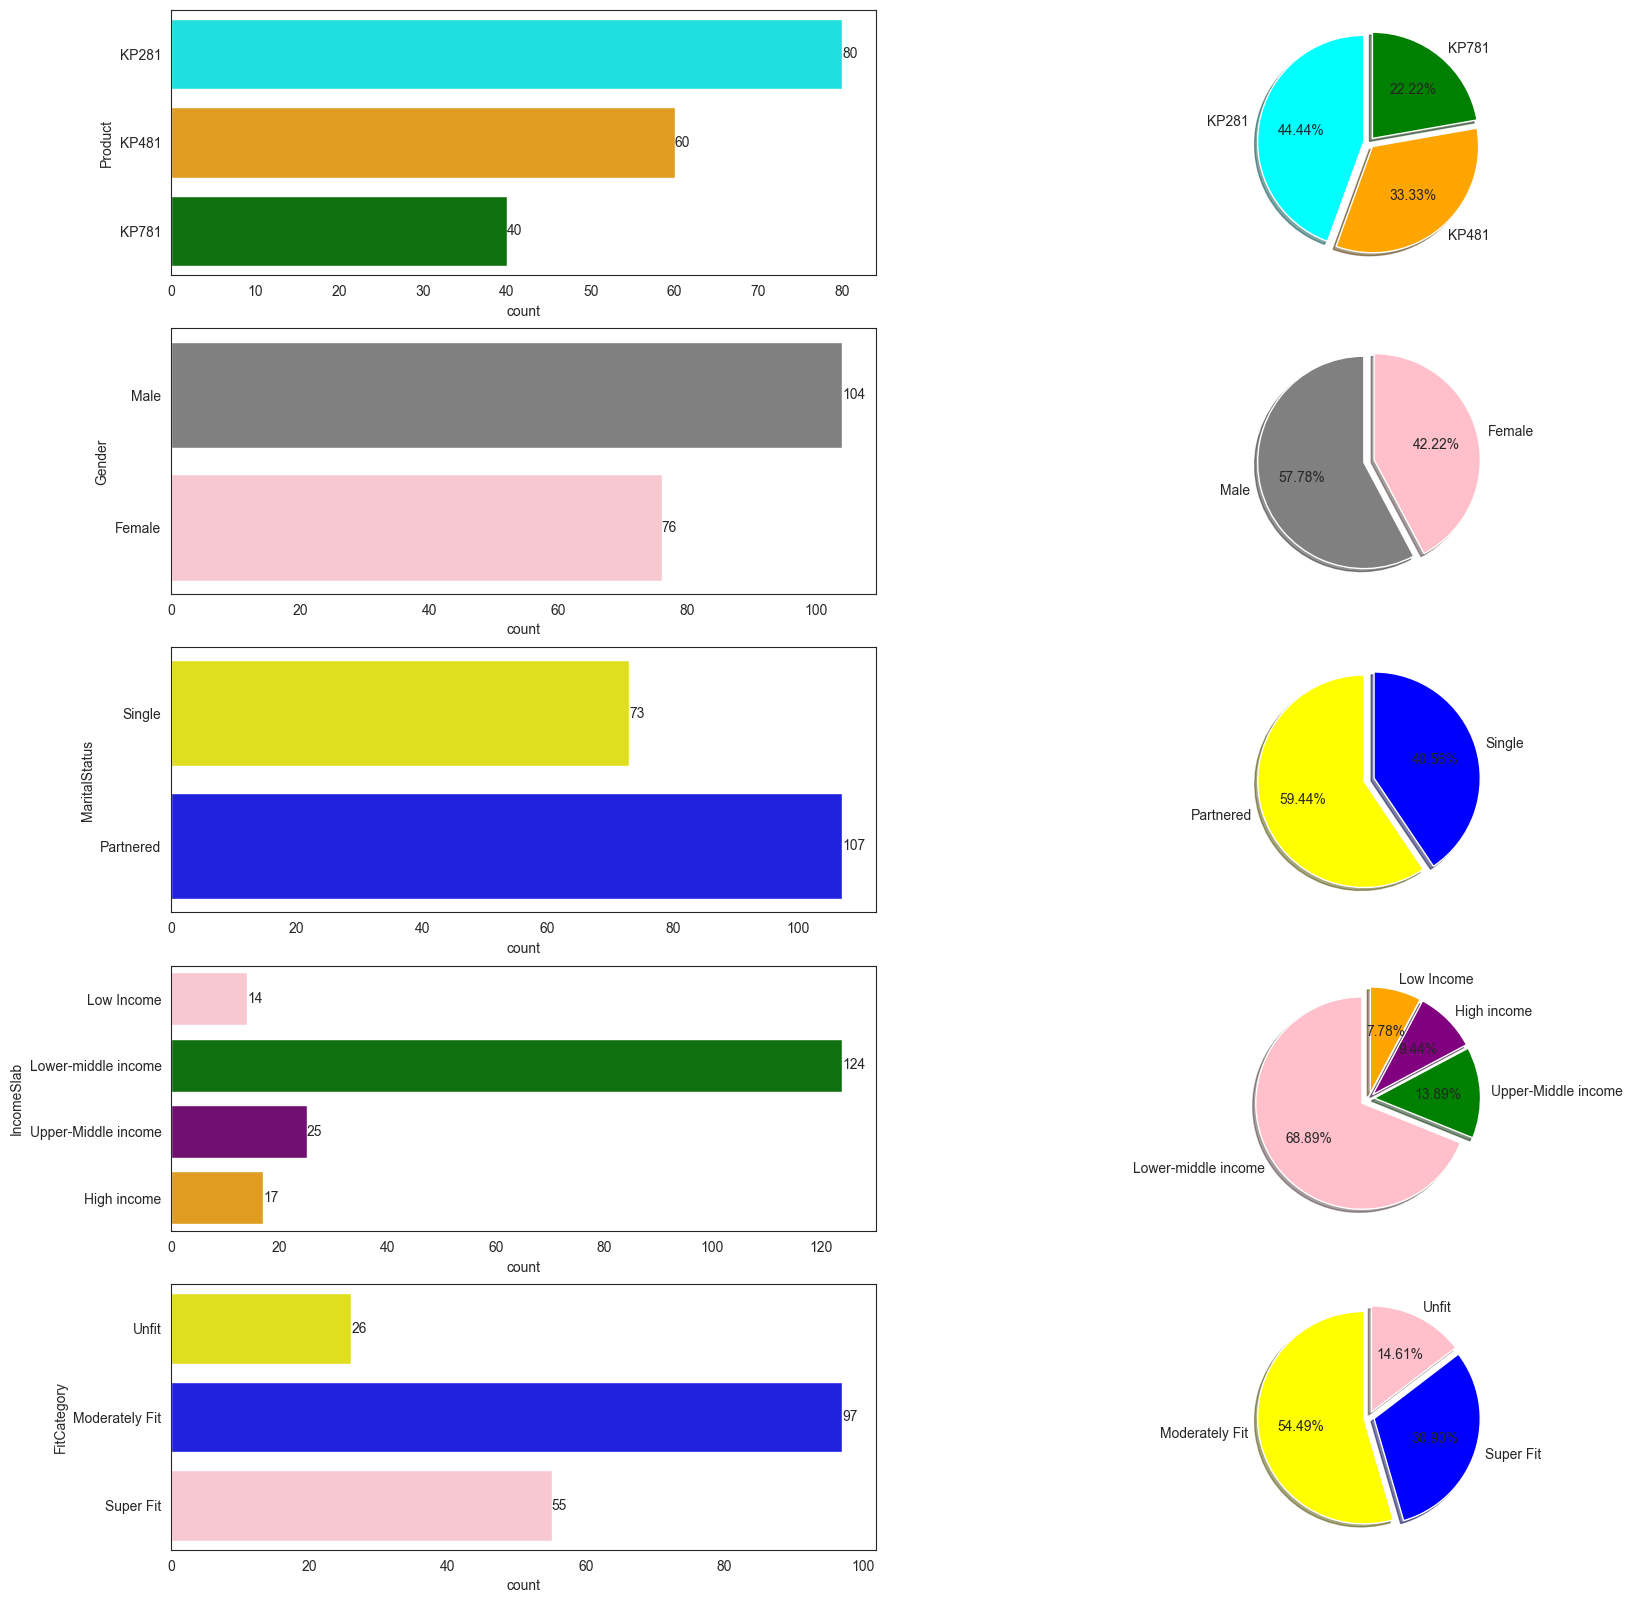

In [237]:
plt.figure(figsize=(20, 20))

plt.subplot(5,2,1)
label = sns.countplot(data=df, y='Product', palette= ['cyan','orange','green'])
for i in label.containers:
    label.bar_label(i)

plt.subplot(5,2,2)
plt.pie(x=df['Product'].value_counts(), startangle=90, shadow=True, explode=[0.05,0.05,0.05], autopct='%1.2f%%', 
       colors=['cyan','orange','green'], labels=df['Product'].value_counts().index)

plt.subplot(5,2,3)
label = sns.countplot(data=df, y='Gender', palette=['Grey','Pink'])
for i in label.containers:
    label.bar_label(i)
    
plt.subplot(5,2,4)
plt.pie(x=df['Gender'].value_counts(), startangle=90, shadow=True, explode=[0.05,0.05], autopct='%1.2f%%', 
       colors=['Grey','Pink'], labels=df['Gender'].value_counts().index)

plt.subplot(5,2,5)
label = sns.countplot(data=df, y='MaritalStatus', palette=['yellow','blue'])
for i in label.containers:
    label.bar_label(i)
    
plt.subplot(5,2,6)
plt.pie(x=df['MaritalStatus'].value_counts(), startangle=90, shadow=True, explode=[0.05,0.05], autopct='%1.2f%%', 
        colors=['yellow','blue'], labels=df['MaritalStatus'].value_counts().index)

plt.subplot(5,2,7)
label = sns.countplot(data=df, y='IncomeSlab', palette=['pink','green','purple','orange'])
for i in label.containers:
    label.bar_label(i)
    
plt.subplot(5,2,8)
plt.pie(x=df['IncomeSlab'].value_counts(), startangle=90, shadow=True, explode=[0.08,0.05,0.05,0.05], autopct='%1.2f%%', 
        colors=['pink','green','purple','orange'], labels=df['IncomeSlab'].value_counts().index)

plt.subplot(5,2,9)
label = sns.countplot(data=df, y='FitCategory', palette=['yellow','blue','pink'])
for i in label.containers:
    label.bar_label(i)
    
plt.subplot(5,2,10)
plt.pie(x=df['FitCategory'].value_counts(), startangle=90, shadow=True, explode=[0.05,0.05,0.05], autopct='%1.2f%%', 
        colors=['yellow','blue','pink'], labels=df['FitCategory'].value_counts().index)

plt.show()

Insights

Product

* Treadmill KP281 has the highest share with 44.44% followed by KP481 with 33.33% followed by KP781 with around 22.22%.
* Out of 180, KP281 is owned by 80 people, KP481 is owned by 60 people and KP781 is owned by 40 people.

Gender

* Male own 57.8% of the treadmills. 
* Whereas, female own 42.22% of the treadmills.
* Out of 180, 104 treadmills are owned by men and the remaining 76 are owned by female.

Marital Status

* 59.44% or 107 owners are either married or have partners.
* Remaining 40.56% or 73 owners are single. 

Income - Slab

* Most people which is 68.89% or 124 customers owning the treadmill belong to the Lower-Middle Income Category, which is between $35000 and $60000.
* 13.89% owners or 25 customers belong to the Upper-Middle Income Category which is $65000 - $85000.
* 9.44% owners or 17 customers belong to the High Income Category which is above $85000. 
* Remainging 7.78% or 14 customers belong to the Low income category which is below $35000.

Fitness

* Most owners or 54.49% or 97 people are Moderately fit.
* 30.90% or 55 owners are super fit.
* Remaining 14.61% or 26 people are unfit. 

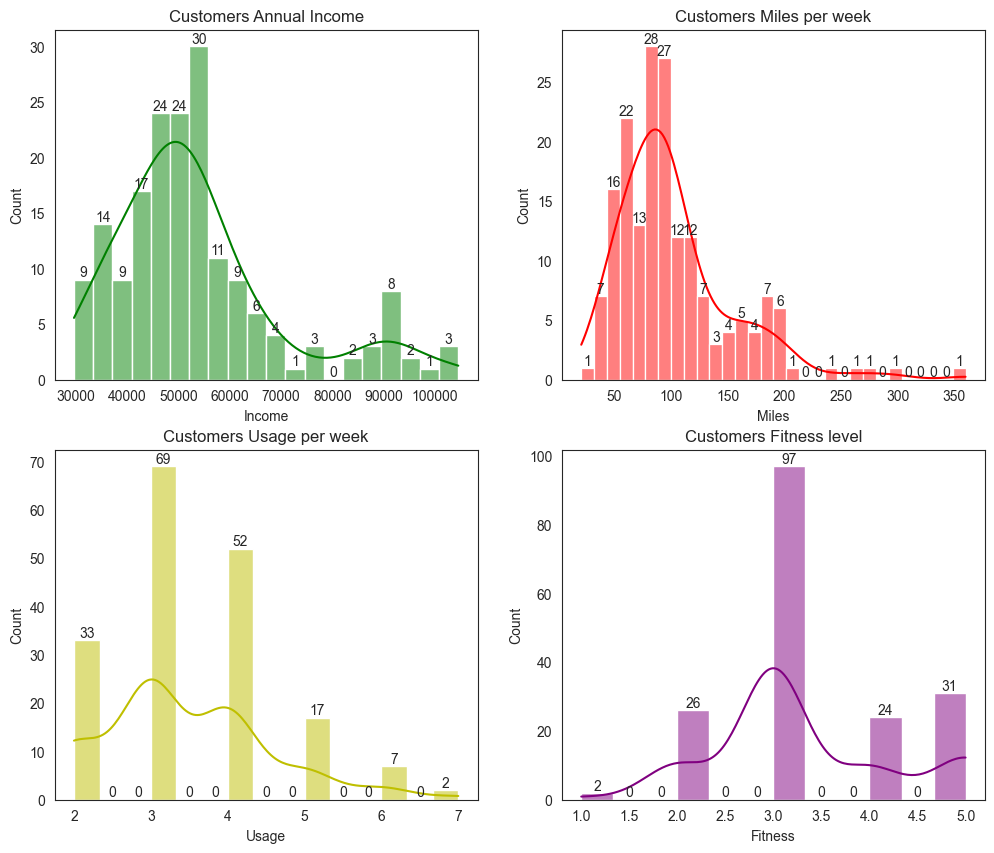

In [207]:
fig,ax = plt.subplots(nrows=2, ncols=2, figsize=(12,10))

label = sns.histplot(df['Income'], kde=True, bins=20, ax=ax[0,0], color='g'); ax[0,0].set_title("Customers Annual Income")
for i in label.containers:
    label.bar_label(i)

label = sns.histplot(df['Miles'], kde=True, bins=30, ax=ax[0,1], color='r'); ax[0,1].set_title("Customers Miles per week")
for i in label.containers:
    label.bar_label(i)

label = sns.histplot(df['Usage'], kde=True, ax=ax[1,0], color='y'); ax[1,0].set_title("Customers Usage per week")
for i in label.containers:
    label.bar_label(i)

label = sns.histplot(df['Fitness'], kde=True, ax=ax[1,1], color='purple'); ax[1,1].set_title("Customers Fitness level")
for i in label.containers:
    label.bar_label(i)

plt.show()

### Bi-variate Analysis


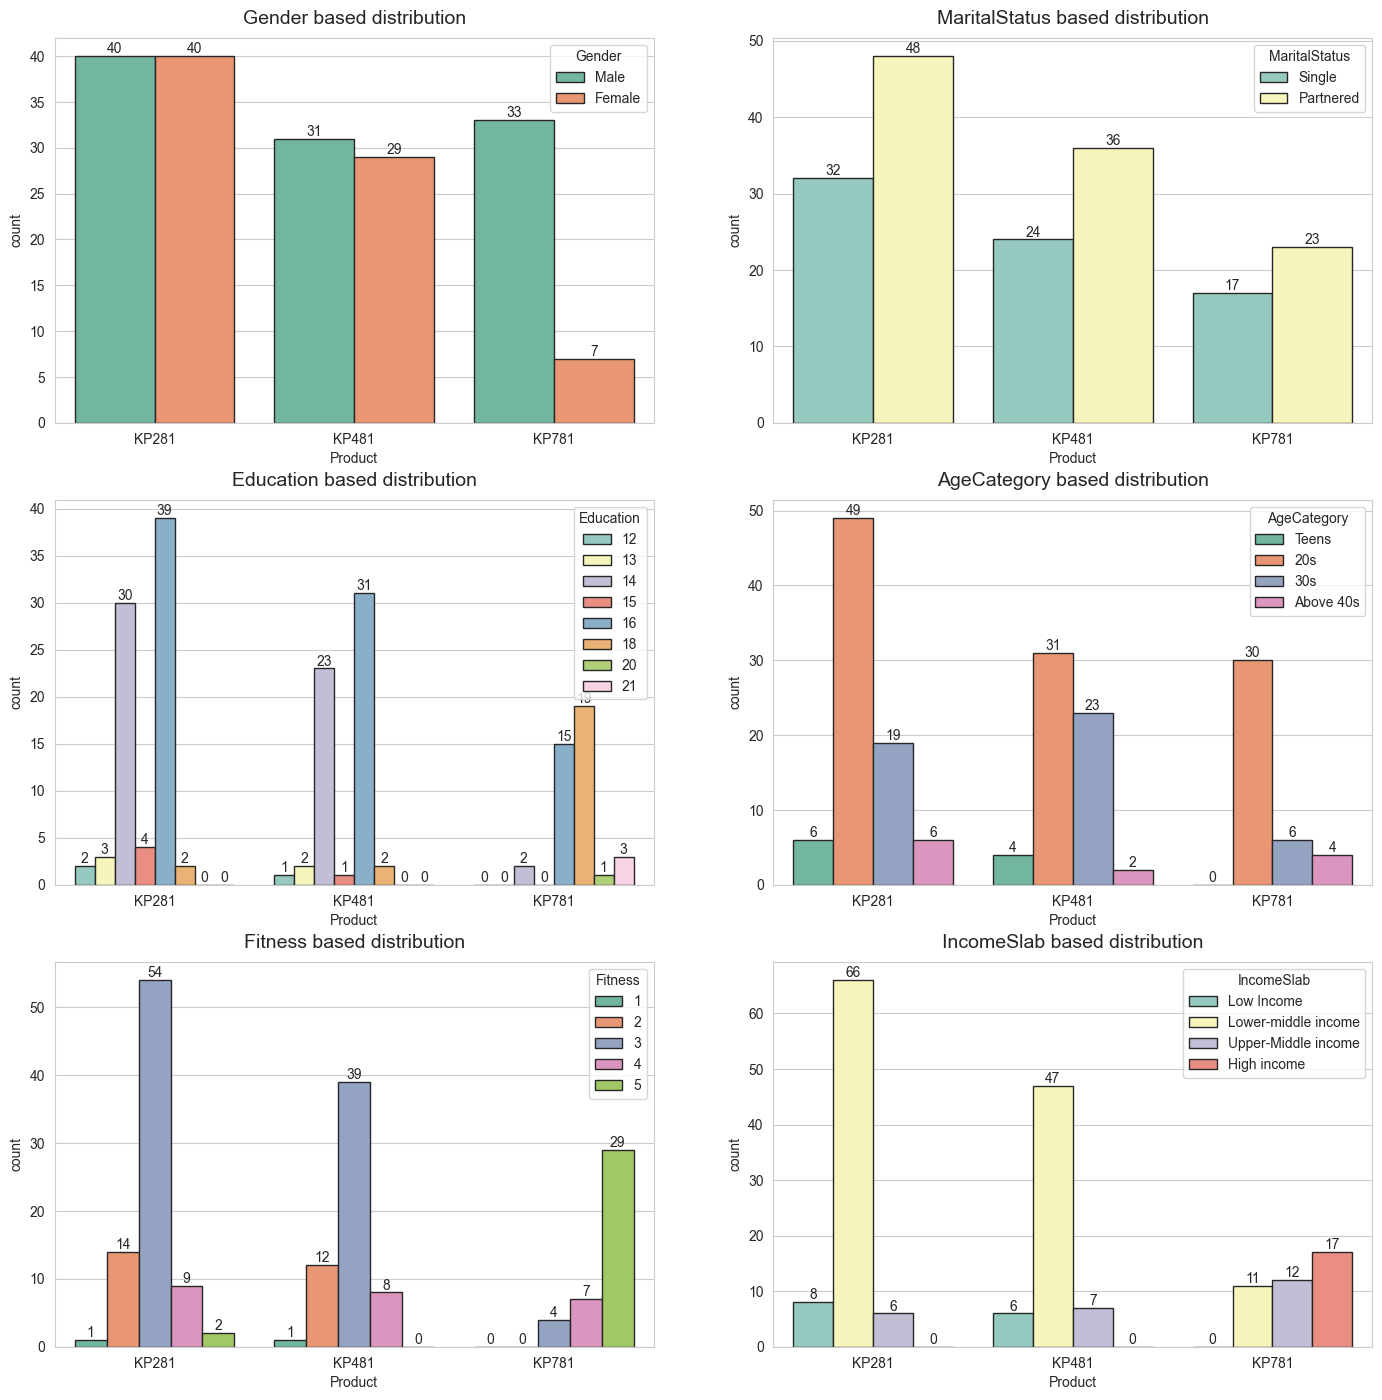

In [208]:
sns.set_style(style='whitegrid')
fig, axs = plt.subplots(nrows=3, ncols=2, figsize=(17, 17))

label = sns.countplot(data=df, x='Product', hue='Gender', edgecolor="0.15", palette='Set2', ax=axs[0,0])
for i in label.containers:
    label.bar_label(i)
    
label = sns.countplot(data=df, x='Product', hue='MaritalStatus', edgecolor="0.15", palette='Set3', ax=axs[0,1])
for i in label.containers:
    label.bar_label(i)
    
label = sns.countplot(data=df, x='Product', hue='Education', edgecolor="0.15", palette='Set3', ax=axs[1,0])
for i in label.containers:
    label.bar_label(i)
    
label = sns.countplot(data=df, x='Product', hue='AgeCategory', edgecolor="0.15", palette='Set2', ax=axs[1,1])
for i in label.containers:
    label.bar_label(i)
        
label = sns.countplot(data=df, x='Product', hue='Fitness', edgecolor="0.15", palette='Set2', ax=axs[2,0])
for i in label.containers:
    label.bar_label(i)

label = sns.countplot(data=df, x='Product', hue='IncomeSlab', edgecolor="0.15", palette='Set3', ax=axs[2,1])
for i in label.containers:
    label.bar_label(i)
    
axs[0,0].set_title("Gender based distribution", pad=10, fontsize=14)
axs[0,1].set_title("MaritalStatus based distribution", pad=10, fontsize=14)
axs[1,0].set_title("Education based distribution", pad=10, fontsize=14)
axs[1,1].set_title("AgeCategory based distribution", pad=10, fontsize=14)
axs[2,0].set_title("Fitness based distribution", pad=10, fontsize=14)
axs[2,1].set_title("IncomeSlab based distribution", pad=10, fontsize=14)

plt.show()

Insights 

KP281

* Gender based distribution - Equally owned between men and women (40-40).
* Marital Status based - 48 owned by partnered and 32 owned by singles.
* Education based - 39 owners have 16 years of education, 30 have 14 years of education. 
* AgeCategory based - 49 owners belong to the 20s and 19 belong to the 30s and 6 owners are above 40 years of age. 
* Fitness based - 54 owners are moderately fit.
* IncomeSlab based - 66 owners belong to the Lower - middle income category and remaining 14 belong to Low and Upper-middle income category.

KP481
* Gender based distribution - 31 owners are male and 29 are female. 
* Marital Status based - 36 owned by partnered and 24 owned by singles.
* Education based - 31 owners have 16 years of education, 23 have 14 years of education. 
* AgeCategory based - 31 owners belong to the 20s and 23 belong to the 30s and 2 owners are above 40 years of age. 
* Fitness based - 39 owners are moderately fit.
* IncomeSlab based - 47 owners belong to the Lower - middle income category and remaining 13 belong to Low and Upper-middle income category.

KP781
* Gender based distribution - 33 owners are male and 7 are female. 
* Marital Status based - 23 owned by partnered and 17 owned by singles.
* Education based - 19 owners have 18 years of education, 15 have 16 years of education. 
* AgeCategory based - 30 owners belong to the 20s and 6 belong to the 30s and 4 owners are above 40 years of age.  
* Fitness based - 29 owners are super fit.
* IncomeSlab based - 11 owners belong to the Lower - middle income category, 17 belong to High income and 12 to Upper-middle income category.

### Multi-variate Analysis


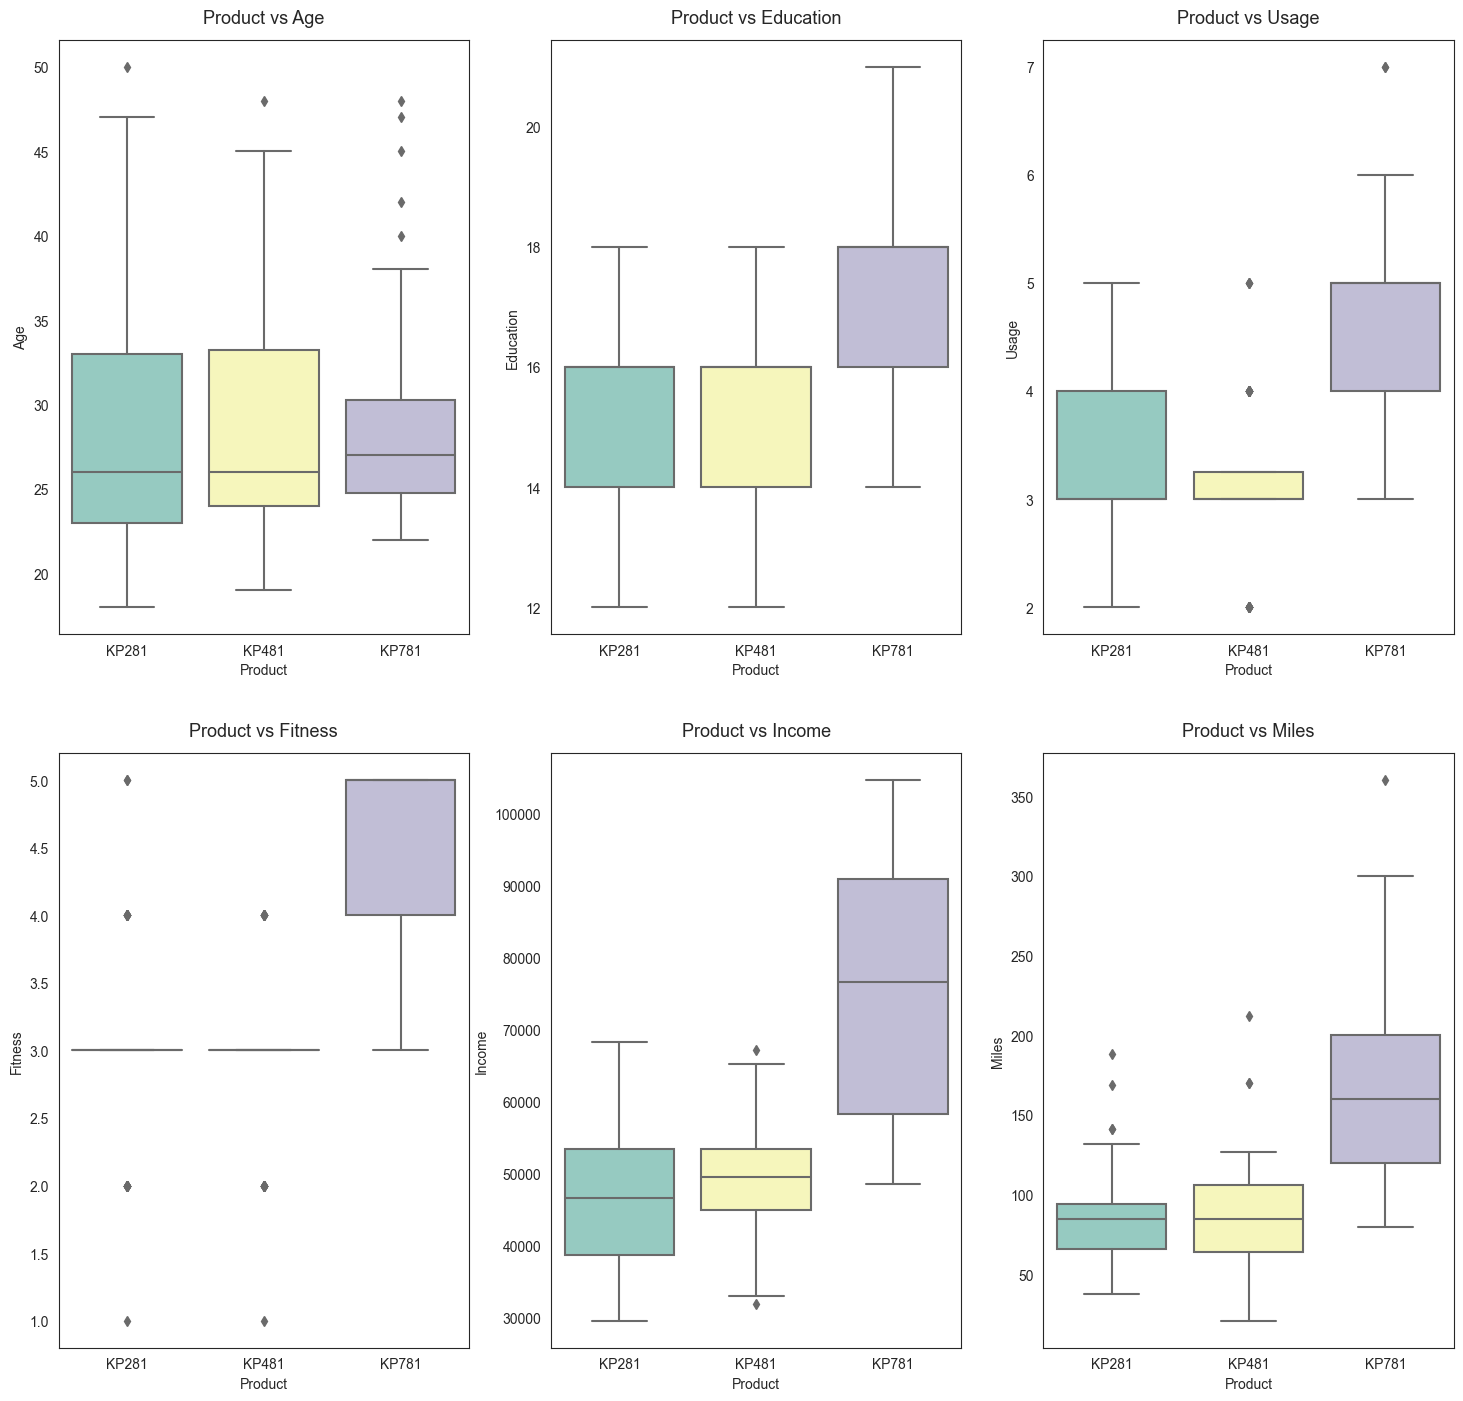

In [209]:
attrs = ['Age', 'Education', 'Usage', 'Fitness', 'Income', 'Miles']
sns.set_style("white")
fig, axs = plt.subplots(nrows=2, ncols=3, figsize=(18, 12))
fig.subplots_adjust(top=1.2)
count = 0
for i in range(2):
    for j in range(3):
        sns.boxplot(data=df, x='Product', y=attrs[count], ax=axs[i,j], palette='Set3')
        axs[i,j].set_title(f"Product vs {attrs[count]}", pad=12, fontsize=13)
        count += 1

Insights

Product vs Age

* KP281 - Bought by people of age 18-47. Median age is 26.
* KP481 - Bought by people of age 19-45. Median age is 26.
* KP781 - Bought by people of age 22-38. Median age is 27.

Product vs Education

* KP281 - Bought by people with 12-18 years of education.
* KP481 - Bought by people with 12-18 years of education.
* KP781 - Bought by people with 14-21 years of education.

Product vs Usage

* KP281 - Used 2-5 times per week. 
* KP481 - Used 3 times per week. 
* KP781 - Used 3-6 times per week. 

Product vs Fitness

* KP281 - Used by moderately fit people.
* KP481 - Used by moderately fit people.
* KP781 - Used by extremely fit people.

Product vs Income

* KP281 - Owned by people earning between $30000 and $68000. Median income is $48000.
* KP481 - Owned by people earning between $35000 and $66000. Median income is $50000.
* KP781 - Owned by people earning between $48000 and $105000. Median income is $78000.

Product vs Miles

* KP281 - Expected walk is 45-140 miles per week. Median expectation is 90 miles.
* KP481 - Expected walk is 20-135 miles per week. Median expectation is 90 miles.
* KP781 - Expected walk is 85-300 miles per week. Median expectation is 160 miles.

C:\Users\Rhythm Shah\AppData\Local\Temp\ipykernel_33060\3114488613.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), annot=True, vmin=-1, vmax = 1,cmap="YlGnBu")


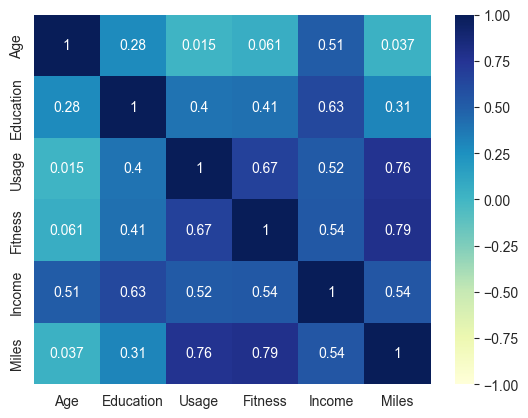

In [210]:
sns.heatmap(df.corr(), annot=True, vmin=-1, vmax = 1,cmap="YlGnBu") 
plt.show()

Insights

* Age is slightly correlated with Usage, Fitness and Miles. Age is moderately correlated with Income.
* Education is moderately correlated with Income.
* Usage is moderately correlated with Miles and Fitness and slightly with Age.
* Fitness is highly ccorrelated with Miles and moderately with Usage and Income.
* Income is moderately correlated with everything.
* Miles is highly correlated with Usage and Fitness, moderately with Income and slightly with Age.

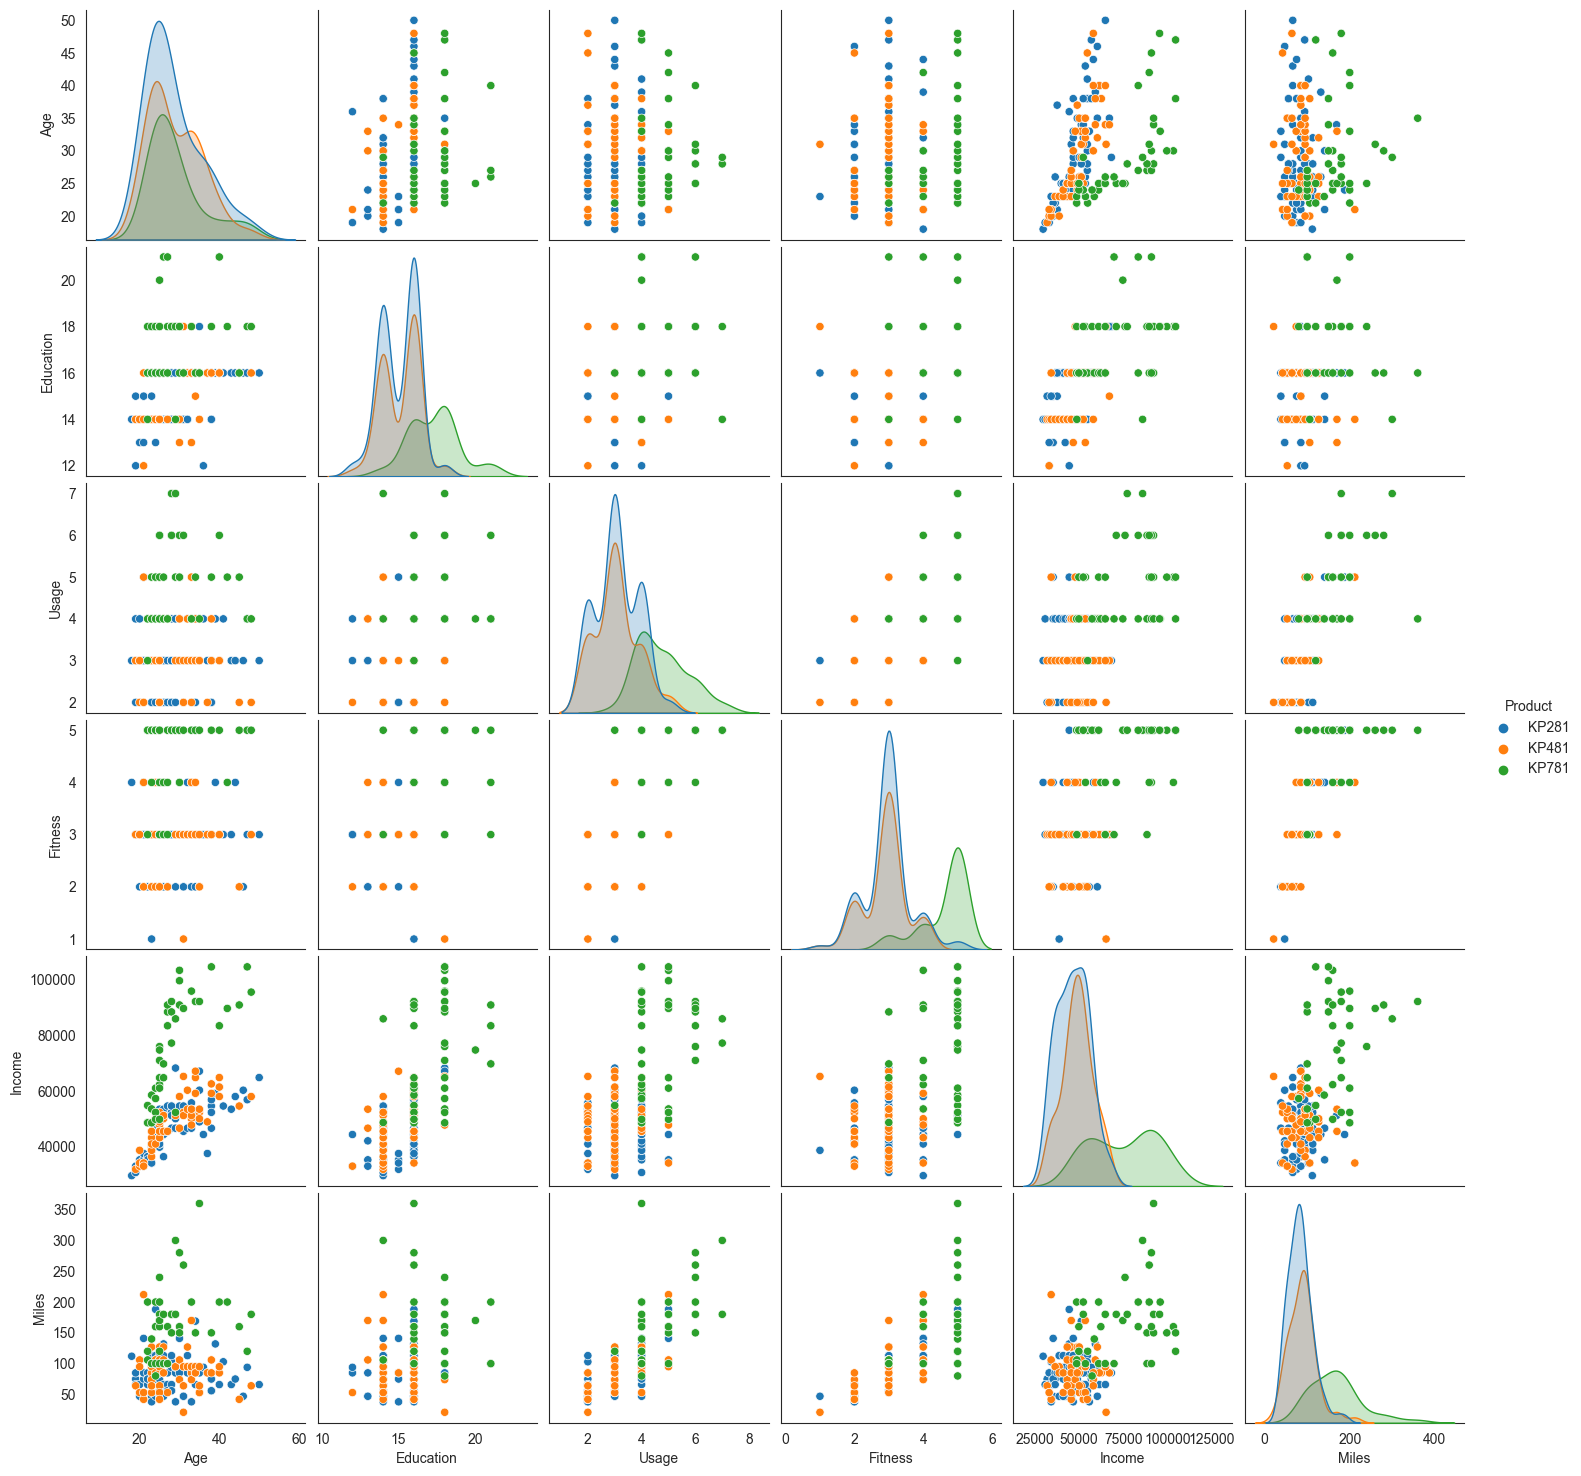

In [211]:
sns.pairplot(df,hue='Product')
plt.show()

Marginal Probabilities



In [212]:
df1 = round(df['Product'].value_counts(normalize=True),2)

print("Probability of a random customer owning a KP281 Tredmill is",df1[0])
print("Probability of a random customer owning a KP481 Tredmill is",df1[1])
print("Probability of a random customer owning a KP781 Tredmill is",df1[2])

Probability of a random customer owning a KP281 Tredmill is 0.44
Probability of a random customer owning a KP481 Tredmill is 0.33
Probability of a random customer owning a KP781 Tredmill is 0.22


In [213]:
print("Probability of a random customer being a male is",round(df[df['Gender']=='Male'].shape[0]/df.shape[0],2))
print("Probability of a random customer being a female is",round(df[df['Gender']=='Female'].shape[0]/df.shape[0],2))

Probability of a random customer being a male is 0.58
Probability of a random customer being a female is 0.42


In [214]:
print("Probability of a random customer being Single is",round(df[df['MaritalStatus']=='Single'].shape[0]/df.shape[0],2))
print("Probability of a random customer being Partnered is",round(df[df['MaritalStatus']=='Partnered'].shape[0]/df.shape[0],2))

Probability of a random customer being Single is 0.41
Probability of a random customer being Partnered is 0.59


In [215]:
print("Probability of a random customer being a Teen is",round(df[df['AgeCategory']=='Teens'].shape[0]/df.shape[0],2))
print("Probability of a random customer being in their 20s is",round(df[df['AgeCategory']=='20s'].shape[0]/df.shape[0],2))
print("Probability of a random customer being in their 30s is",round(df[df['AgeCategory']=='30s'].shape[0]/df.shape[0],2))
print("Probability of a random customer being 40+ in age is",round(df[df['AgeCategory']=='Above 40s'].shape[0]/df.shape[0],2))

Probability of a random customer being a Teen is 0.06
Probability of a random customer being in their 20s is 0.61
Probability of a random customer being in their 30s is 0.27
Probability of a random customer being 40+ in age is 0.07


In [216]:
print("Probability of a random customer belonging to Low Income Category is",round(df[df['IncomeSlab']=='Low Income'].shape[0]/df.shape[0],2))
print("Probability of a random customer belonging to Lower - Middle Income Category is",round(df[df['IncomeSlab']=='Lower-middle income'].shape[0]/df.shape[0],2))
print("Probability of a random customer belonging to Upper - Middle Income Category is",round(df[df['IncomeSlab']=='Upper-Middle income'].shape[0]/df.shape[0],2))
print("Probability of a random customer belonging to High Income Category is",round(df[df['IncomeSlab']=='High income'].shape[0]/df.shape[0],2))

Probability of a random customer belonging to Low Income Category is 0.08
Probability of a random customer belonging to Lower - Middle Income Category is 0.69
Probability of a random customer belonging to Upper - Middle Income Category is 0.14
Probability of a random customer belonging to High Income Category is 0.09


##### Conditional Probabilities


In [217]:
df_crosstab_Prod_Age_Bracket = pd.crosstab(df['AgeCategory'],df['Product'],margins=True)
df_crosstab_Prod_Age_Bracket

Product,KP281,KP481,KP781,All
AgeCategory,,,,
Teens,6,4,0,10
20s,49,31,30,110
30s,19,23,6,48
Above 40s,6,2,4,12
All,80,60,40,180


In [218]:
df_total = df_crosstab_Prod_Age_Bracket.loc['All']['All']
df_total

180

In [219]:
print("Probability of a random customer being a Teen and buying product KP281  is",round(df_crosstab_Prod_Age_Bracket.loc['Teens']['KP281']/df_total,2))
print("Probability of a random customer being in their 20s and buying product KP281 is",round(df_crosstab_Prod_Age_Bracket.loc['20s']['KP281']/df_total,2))
print("Probability of a random customer being in their 30s and buying product KP281 is",round(df_crosstab_Prod_Age_Bracket.loc['30s']['KP281']/df_total,2))
print("Probability of a random customer being above 40 and buying product KP281 is",round(df_crosstab_Prod_Age_Bracket.loc['Above 40s']['KP281']/df_total,2))

Probability of a random customer being a Teen and buying product KP281  is 0.03
Probability of a random customer being in their 20s and buying product KP281 is 0.27
Probability of a random customer being in their 30s and buying product KP281 is 0.11
Probability of a random customer being above 40 and buying product KP281 is 0.03


In [220]:
print("Probability of a random customer being a Teen and buying product KP481  is",round(df_crosstab_Prod_Age_Bracket.loc['Teens']['KP481']/df_total,2))
print("Probability of a random customer being in their 20s and buying product KP481 is",round(df_crosstab_Prod_Age_Bracket.loc['20s']['KP481']/df_total,2))
print("Probability of a random customer being in their 30s and buying product KP481 is",round(df_crosstab_Prod_Age_Bracket.loc['30s']['KP481']/df_total,2))
print("Probability of a random customer being above 40 and buying product KP281 is",round(df_crosstab_Prod_Age_Bracket.loc['Above 40s']['KP481']/df_total,2))

Probability of a random customer being a Teen and buying product KP481  is 0.02
Probability of a random customer being in their 20s and buying product KP481 is 0.17
Probability of a random customer being in their 30s and buying product KP481 is 0.13
Probability of a random customer being above 40 and buying product KP281 is 0.01


In [221]:
print("Probability of a random customer being a Teen and buying product KP781  is",round(df_crosstab_Prod_Age_Bracket.loc['Teens']['KP781']/df_total,2))
print("Probability of a random customer being in their 20s and buying product KP781 is",round(df_crosstab_Prod_Age_Bracket.loc['20s']['KP781']/df_total,2))
print("Probability of a random customer being in their 30s and buying product KP781 is",round(df_crosstab_Prod_Age_Bracket.loc['30s']['KP781']/df_total,2))
print("Probability of a random customer being above 40 and buying product KP281 is",round(df_crosstab_Prod_Age_Bracket.loc['Above 40s']['KP781']/df_total,2))

Probability of a random customer being a Teen and buying product KP781  is 0.0
Probability of a random customer being in their 20s and buying product KP781 is 0.17
Probability of a random customer being in their 30s and buying product KP781 is 0.03
Probability of a random customer being above 40 and buying product KP281 is 0.02


In [222]:
print("Conditional Probabality")
print("Probability of a buying product KP281 given he is a Teen is",round(df_crosstab_Prod_Age_Bracket.loc['Teens']['KP281']/df_crosstab_Prod_Age_Bracket.loc['Teens']['All'],2))
print("Probability of a buying product KP281 given he is in 20s  is",round(df_crosstab_Prod_Age_Bracket.loc['20s']['KP281']/df_crosstab_Prod_Age_Bracket.loc['20s']['All'],2))
print("Probability of a buying product KP281 given he is in 30s  is",round(df_crosstab_Prod_Age_Bracket.loc['30s']['KP281']/df_crosstab_Prod_Age_Bracket.loc['30s']['All'],2))
print("Probability of a buying product KP281 given he is in 40s  is",round(df_crosstab_Prod_Age_Bracket.loc['Above 40s']['KP281']/df_crosstab_Prod_Age_Bracket.loc['Above 40s']['All'],2))

Conditional Probabality
Probability of a buying product KP281 given he is a Teen is 0.6
Probability of a buying product KP281 given he is in 20s  is 0.45
Probability of a buying product KP281 given he is in 30s  is 0.4
Probability of a buying product KP281 given he is in 40s  is 0.5


In [223]:
print("Probability of a buying product KP481 given he is a Teen is",round(df_crosstab_Prod_Age_Bracket.loc['Teens']['KP481']/df_crosstab_Prod_Age_Bracket.loc['Teens']['All'],2))
print("Probability of a buying product KP481 given he is in 20s  is",round(df_crosstab_Prod_Age_Bracket.loc['20s']['KP481']/df_crosstab_Prod_Age_Bracket.loc['20s']['All'],2))
print("Probability of a buying product KP481 given he is in 30s  is",round(df_crosstab_Prod_Age_Bracket.loc['30s']['KP481']/df_crosstab_Prod_Age_Bracket.loc['30s']['All'],2))
print("Probability of a buying product KP481 given he is in 40s  is",round(df_crosstab_Prod_Age_Bracket.loc['Above 40s']['KP481']/df_crosstab_Prod_Age_Bracket.loc['Above 40s']['All'],2))

Probability of a buying product KP481 given he is a Teen is 0.4
Probability of a buying product KP481 given he is in 20s  is 0.28
Probability of a buying product KP481 given he is in 30s  is 0.48
Probability of a buying product KP481 given he is in 40s  is 0.17


In [224]:
print("Probability of a buying product KP781 given he is a Teen is",round(df_crosstab_Prod_Age_Bracket.loc['Teens']['KP781']/df_crosstab_Prod_Age_Bracket.loc['Teens']['All'],2))
print("Probability of a buying product KP781 given he is in 20s  is",round(df_crosstab_Prod_Age_Bracket.loc['20s']['KP781']/df_crosstab_Prod_Age_Bracket.loc['20s']['All'],2))
print("Probability of a buying product KP781 given he is in 30s  is",round(df_crosstab_Prod_Age_Bracket.loc['30s']['KP781']/df_crosstab_Prod_Age_Bracket.loc['30s']['All'],2))
print("Probability of a buying product KP781 given he is in 40s  is",round(df_crosstab_Prod_Age_Bracket.loc['Above 40s']['KP781']/df_crosstab_Prod_Age_Bracket.loc['Above 40s']['All'],2))

Probability of a buying product KP781 given he is a Teen is 0.0
Probability of a buying product KP781 given he is in 20s  is 0.27
Probability of a buying product KP781 given he is in 30s  is 0.12
Probability of a buying product KP781 given he is in 40s  is 0.33


In [225]:
df_crosstab_Prod_Income_Bracket = pd.crosstab( df['IncomeSlab'],df['Product'],margins=True)
df_crosstab_Prod_Income_Bracket

Product,KP281,KP481,KP781,All
IncomeSlab,,,,
Low Income,8,6,0,14
Lower-middle income,66,47,11,124
Upper-Middle income,6,7,12,25
High income,0,0,17,17
All,80,60,40,180


In [226]:
df_total_Income = df_crosstab_Prod_Age_Bracket.loc['All']['All']
df_total_Income

180

In [227]:
print("Joint Probabality")
print("Probability of a random customer being in Low Income group and has bought KP281 is",round(df_crosstab_Prod_Income_Bracket.loc['Low Income']['KP281']/df_total_Income,2))
print("Probability of a random customer being in Lower middle Income group and has bought KP281 is",round(df_crosstab_Prod_Income_Bracket.loc['Lower-middle income']['KP281']/df_total_Income,2))
print("Probability of a random customer being in Upper middle Income group and has bought KP281 is",round(df_crosstab_Prod_Income_Bracket.loc['Upper-Middle income']['KP281']/df_total_Income,2))
print("Probability of a random customer being in High Income group and has bought KP281 is",round(df_crosstab_Prod_Income_Bracket.loc['High income']['KP281']/df_total_Income,2))

Joint Probabality
Probability of a random customer being in Low Income group and has bought KP281 is 0.04
Probability of a random customer being in Lower middle Income group and has bought KP281 is 0.37
Probability of a random customer being in Upper middle Income group and has bought KP281 is 0.03
Probability of a random customer being in High Income group and has bought KP281 is 0.0


In [228]:
print("Joint Probabality")
print("Probability of a random customer being in Low Income group and has bought KP481 is",round(df_crosstab_Prod_Income_Bracket.loc['Low Income']['KP481']/df_total_Income,2))
print("Probability of a random customer being in Lower middle Income group and has bought KP481 is",round(df_crosstab_Prod_Income_Bracket.loc['Lower-middle income']['KP481']/df_total_Income,2))
print("Probability of a random customer being in Upper middle Income group and has bought KP481 is",round(df_crosstab_Prod_Income_Bracket.loc['Upper-Middle income']['KP481']/df_total_Income,2))
print("Probability of a random customer being in High Income group and has bought KP481 is",round(df_crosstab_Prod_Income_Bracket.loc['High income']['KP481']/df_total_Income,2))

Joint Probabality
Probability of a random customer being in Low Income group and has bought KP481 is 0.03
Probability of a random customer being in Lower middle Income group and has bought KP481 is 0.26
Probability of a random customer being in Upper middle Income group and has bought KP481 is 0.04
Probability of a random customer being in High Income group and has bought KP481 is 0.0


In [229]:
print("Joint Probabality")
print("Probability of a random customer being in Low Income group and has bought KP781 is",round(df_crosstab_Prod_Income_Bracket.loc['Low Income']['KP781']/df_total_Income,2))
print("Probability of a random customer being in Lower middle Income group and has bought KP781 is",round(df_crosstab_Prod_Income_Bracket.loc['Lower-middle income']['KP781']/df_total_Income,2))
print("Probability of a random customer being in Upper middle Income group and has bought KP781 is",round(df_crosstab_Prod_Income_Bracket.loc['Upper-Middle income']['KP781']/df_total_Income,2))
print("Probability of a random customer being in High Income group and has bought KP781 is",round(df_crosstab_Prod_Income_Bracket.loc['High income']['KP781']/df_total_Income,2))

Joint Probabality
Probability of a random customer being in Low Income group and has bought KP781 is 0.0
Probability of a random customer being in Lower middle Income group and has bought KP781 is 0.06
Probability of a random customer being in Upper middle Income group and has bought KP781 is 0.07
Probability of a random customer being in High Income group and has bought KP781 is 0.09


In [230]:
print("Conditional Probabality")
print("Probability of a random customer buying KP281 given he belongs to Low Income group is",round(df_crosstab_Prod_Income_Bracket.loc['Low Income']['KP281']/df_crosstab_Prod_Income_Bracket.loc['Low Income']['All'],2))
print("Probability of a random customer buying KP281 given he belongs to Lower middle Income group is",round(df_crosstab_Prod_Income_Bracket.loc['Lower-middle income']['KP281']/df_crosstab_Prod_Income_Bracket.loc['Lower-middle income']['All'],2))
print("Probability of a random customer buying KP281 given he belongs to Upper middle Income group is",round(df_crosstab_Prod_Income_Bracket.loc['Upper-Middle income']['KP281']/df_crosstab_Prod_Income_Bracket.loc['Upper-Middle income']['All'],2))
print("Probability of a random customer buying KP281 given he belongs to High Income group is",round(df_crosstab_Prod_Income_Bracket.loc['High income']['KP281']/df_crosstab_Prod_Income_Bracket.loc['High income']['All'],2))

Conditional Probabality
Probability of a random customer buying KP281 given he belongs to Low Income group is 0.57
Probability of a random customer buying KP281 given he belongs to Lower middle Income group is 0.53
Probability of a random customer buying KP281 given he belongs to Upper middle Income group is 0.24
Probability of a random customer buying KP281 given he belongs to High Income group is 0.0


In [231]:
print("Conditional Probabality")
print("Probability of a random customer buying KP481 given he belongs to Low Income group is",round(df_crosstab_Prod_Income_Bracket.loc['Low Income']['KP481']/df_crosstab_Prod_Income_Bracket.loc['Low Income']['All'],2))
print("Probability of a random customer buying KP481 given he belongs to Lower middle Income group is",round(df_crosstab_Prod_Income_Bracket.loc['Lower-middle income']['KP481']/df_crosstab_Prod_Income_Bracket.loc['Lower-middle income']['All'],2))
print("Probability of a random customer buying KP481 given he belongs to Upper middle Income group is",round(df_crosstab_Prod_Income_Bracket.loc['Upper-Middle income']['KP481']/df_crosstab_Prod_Income_Bracket.loc['Upper-Middle income']['All'],2))
print("Probability of a random customer buying KP481 given he belongs to High Income group is",round(df_crosstab_Prod_Income_Bracket.loc['High income']['KP481']/df_crosstab_Prod_Income_Bracket.loc['High income']['All'],2))

Conditional Probabality
Probability of a random customer buying KP481 given he belongs to Low Income group is 0.43
Probability of a random customer buying KP481 given he belongs to Lower middle Income group is 0.38
Probability of a random customer buying KP481 given he belongs to Upper middle Income group is 0.28
Probability of a random customer buying KP481 given he belongs to High Income group is 0.0


In [232]:
print("Conditional Probabality")
print("Probability of a random customer buying KP781 given he belongs to Low Income group is",round(df_crosstab_Prod_Income_Bracket.loc['Low Income']['KP781']/df_crosstab_Prod_Income_Bracket.loc['Low Income']['All'],2))
print("Probability of a random customer buying KP781 given he belongs to Lower middle Income group is",round(df_crosstab_Prod_Income_Bracket.loc['Lower-middle income']['KP781']/df_crosstab_Prod_Income_Bracket.loc['Lower-middle income']['All'],2))
print("Probability of a random customer buying KP781 given he belongs to Upper middle Income group is",round(df_crosstab_Prod_Income_Bracket.loc['Upper-Middle income']['KP781']/df_crosstab_Prod_Income_Bracket.loc['Upper-Middle income']['All'],2))
print("Probability of a random customer buying KP781 given he belongs to High Income group is",round(df_crosstab_Prod_Income_Bracket.loc['High income']['KP781']/df_crosstab_Prod_Income_Bracket.loc['High income']['All'],2))

Conditional Probabality
Probability of a random customer buying KP781 given he belongs to Low Income group is 0.0
Probability of a random customer buying KP781 given he belongs to Lower middle Income group is 0.09
Probability of a random customer buying KP781 given he belongs to Upper middle Income group is 0.48
Probability of a random customer buying KP781 given he belongs to High Income group is 1.0


# Insights for Products:

KP281 customer's profile
* Highest chances among other products.
* Usage under 4days per week.
* Fitness level mostly under 3.
* Less to medium earning customers.
* Females who Partnered most chance than Females who are single.
* Customers who educated under 16 years most preferable.
* Customers whose usage under 120 miles per week

KP481 customer's profile
* Second Popular Product.
* Usage under 4days per week.
* Fitness level mostly under 3.
* Less to medium earning customers.
* Male customers who partnered prefer more than Male customers who single.
* It has almost similar customer's profile like KP281, but KP281 is wide range of customers than KP481.

KP781 customer's profile
* Mostly preferred by Male customers.
* Usage more than 120 miles per week.
* Fitness level more than 3.
* Usage more than 4 days per week.
* Customers who educated more than 16 years.
* High salaried Customers.

# General Business Insights

* 57.78% Customers are Male.
* 59.44% Customers are Partnered.
* Most sold product KP281, its 44.44% of sales out of overall Aerofit Treadmill sale.
* KP281, KP481 products have almost similar customer’s profile, except Male Partnered prefer KP481 & Female Partnered prefer KP281.
* KP781 product is most preferred by Males, it’s almost 6 times compared to Females.
* 75% of customers are earning less than 60k, and customers who earning more than 60k prefer KP781.
* KP781 had unique among other treadmills when it comes more usage or high fitness customer.
* Probability of Buying KP281 increased from 44.44% to 58.7%, if customer is Female and Partnered.
* Probability of Buying KP781 increased from 22.22% to 32.56%, if customer is Male and Single.
*  Probability of Buying KP781 decreased from 22.22% to 8.7%, if customer is Female and Partnered.

# *Recommendations:*

1. Product KP781 is mostly prefered by males and highly salaried people. Hence,KP781 can be promoted to people belonging to high salary category.

2. More premium products can also be promoted to people belonging to high salary category

3. Most people are buying KP281 product. But they can be encouraged to buy KP481 by giving them no cost EMI options

4. More Ads can be given on Social media or E-commerce websites in order to increase the reach for the producst of Aerofit.

5. Treadmill data can be used to monitor activities of people. And accordingly new producst can be suggested to people through advertisment on treadmill screens.

6. Target more customers having age between 18 to 35 as more than 85% of the customers who bought treadmill lie in this range.

7. People with Education levels less than or equal to 16 are likely to purchase KP281 and KP481. And people with Education levels greater than or equal to 16 are likely to purchase KP781.

8. People with Usage less than or equal to 4 are likely to purchase KP281 and KP481. And people with Usage greater than or equal to 4 are likely to purchase KP781.

9. People with Income less than 6000 are likely to purchase KP281 and KP481. And people with Income greater than 6000 are likely to purchase KP781.

10. People with Fitness Level 3 or less are likely to purchase KP281 and KP481. And with Fitness Level 5 are likely to purchase KP781.

11. People who already have the treadmill are more likely to purchase KP781. As, buying the treadmill is directly proportional to it's usage.